<a href="https://colab.research.google.com/github/AnjaliSamrat/Synthetic-surface-crack-generator/blob/main/Synthetic_surface_cracked_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import subprocess
import glob

# 1. Install unrar (Required for this specific dataset)
print("Installing unrar...")
!apt-get install unrar > /dev/null

# 2. Download and Extract the Dataset (Concrete Crack Images)
dataset_url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip"

# Align archive_name with the actual filename in the URL for consistent extraction behavior.
archive_name = pathlib.Path(dataset_url).name # This will be "concrete_data_week4.zip"

print("Downloading and/or extracting dataset...")
# tf.keras.utils.get_file handles both download and extraction.
# If the file is already downloaded, it checks if it's extracted.
# If extract=True, it returns the path to the extracted directory.
# This ensures extraction happens even if the zip file exists but isn't extracted.
extracted_dataset_root = tf.keras.utils.get_file(
    fname=archive_name,
    origin=dataset_url,
    extract=True,
    cache_subdir=os.path.abspath(".")
)
print(f"Dataset contents extracted to: {extracted_dataset_root}")

# 3. Smart Path Finder (Fixes the "Found 0 files" error)
# This looks for the 'Positive' folder within the extracted dataset root
print("Searching for image directory...")
base_path = extracted_dataset_root # Search from where the dataset was extracted
search_pattern = f"{base_path}/**/Positive"
possible_dirs = glob.glob(search_pattern, recursive=True)

if not possible_dirs:
    raise ValueError(f"Could not find the 'Positive' folder. Check extraction structure. Searched in: {search_pattern}")

# Take the first valid directory found
positive_dir = possible_dirs[0]
print(f"✅ Found image directory at: {positive_dir}")

# Verify images exist
image_count = len(list(pathlib.Path(positive_dir).glob('*.jpg')))
print(f"✅ Found {image_count} images of cracks.")

# 4. Create the Dataset
# We resize to 64x64 for the GAN (easier to train than full size)
BATCH_SIZE = 64
IMG_SIZE = (64, 64)

print("Creating training dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    positive_dir,
    labels=None,        # We don't need labels (Real/Fake is the only label for GANs)
    label_mode=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

# 5. Preprocessing (Normalization)
# GANs work best when images are scaled to [-1, 1] instead of [0, 255]
normalization_layer = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)
train_ds = train_ds.map(lambda x: normalization_layer(x))

# Performance optimization
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 6. Visualize to confirm it worked
plt.figure(figsize=(10, 5))
for images in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        # Rescale back to [0, 1] for viewing
        img_view = (images[i] + 1) / 2.0
        plt.imshow(img_view)
        plt.axis("off")
        plt.title("Real Crack")
plt.show()

print("Stage 1 Complete! Data is ready for the GAN.")

Installing unrar...
261483817/261483817 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Dataset contents extracted to: /content/concrete_data_week4_extracted
Searching for image directory...


ValueError: Could not find the 'Positive' folder. Check extraction structure. Searched in: /content/concrete_data_week4_extracted/**/Positive

Installing unrar...
Dataset contents extracted to: /content/concrete_data_week4_extracted
Searching for image directory...
Multiple or no sub-directories found. Using initial extracted root for search: /content/concrete_data_week4_extracted
Contents of /content/concrete_data_week4_extracted (up to 3 levels deep):
/content/concrete_data_week4_extracted:
concrete_data_week4
__MACOSX

/content/concrete_data_week4_extracted/concrete_data_week4:
test
train
valid

/content/concrete_data_week4_extracted/concrete_data_week4/test:
negative
positive

/content/concrete_data_week4_extracted/concrete_data_week4/test/negative:
19751.jpg
19752.jpg
19753.jpg
19754.jpg
19755.jpg
19756.jpg
19757.jpg
19758.jpg
19759.jpg
19760.jpg
19761.jpg
19762.jpg
19763.jpg
19764.jpg
19765.jpg
19766.jpg
19767.jpg
19768.jpg
19769.jpg
19770.jpg
19771.jpg
19772.jpg
19773.jpg
19774.jpg
19775.jpg
19776.jpg
19777.jpg
19778.jpg
19779.jpg
19780.jpg
19781.jpg
19782.jpg
19783.jpg
19784.jpg
19785.jpg
19786.jpg
Standard search '/c

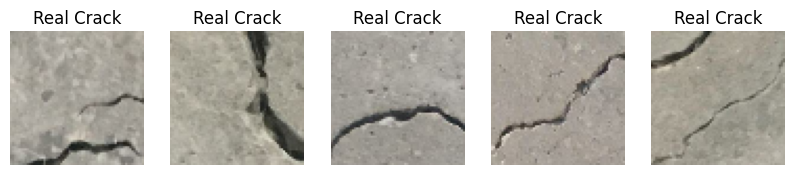

Stage 1 Complete! Data is ready for the GAN.


In [6]:
import tensorflow as tf
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import subprocess
import glob

# 1. Install unrar (Required for this specific dataset)
print("Installing unrar...")
!apt-get install unrar > /dev/null

# 2. Download and Extract the Dataset (Concrete Crack Images)
dataset_url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip"

# Align archive_name with the actual filename in the URL for consistent extraction behavior.
archive_name = pathlib.Path(dataset_url).name # This will be "concrete_data_week4.zip"

print("Downloading and/or extracting dataset...")
# tf.keras.utils.get_file handles both download and extraction.
# If the file is already downloaded, it checks if it's extracted.
# If extract=True, it returns the path to the extracted directory.
# This ensures extraction happens even if the zip file exists but isn't extracted.
extracted_dataset_root = tf.keras.utils.get_file(
    fname=archive_name,
    origin=dataset_url,
    extract=True,
    cache_subdir=os.path.abspath(".")
)
print(f"Dataset contents extracted to: {extracted_dataset_root}")

# 3. Smart Path Finder (Fixes the "Found 0 files" error)
# This looks for the 'Positive' folder within the extracted dataset root
print("Searching for image directory...")

# The tf.keras.utils.get_file extracts the archive, which typically creates a directory
# named after the zip file (without extension) inside the extracted_dataset_root.
# For 'concrete_data_week4.zip', it's highly likely to create 'concrete_data_week4'.
# Let's adjust the base_path to reflect this nested structure.
# First, ensure the outer root is correct, as returned by get_file
actual_extracted_root_path = extracted_dataset_root

# Now, identify the likely *inner* root directory created by the zip archive itself
# For 'concrete_data_week4.zip', this is typically 'concrete_data_week4'
# We can try to dynamically find it, or assume the common name.
subdirs = [d for d in os.listdir(actual_extracted_root_path) if os.path.isdir(os.path.join(actual_extracted_root_path, d))]
if len(subdirs) == 1:
    # If there's only one subdirectory, assume it's the actual content root
    base_path_for_search = os.path.join(actual_extracted_root_path, subdirs[0])
    print(f"Detected single sub-directory '{subdirs[0]}'. Adjusting search base to: {base_path_for_search}")
else:
    # Otherwise, use the original extracted_dataset_root and rely on recursive glob
    base_path_for_search = actual_extracted_root_path
    print(f"Multiple or no sub-directories found. Using initial extracted root for search: {base_path_for_search}")

# Diagnostic: Print the structure to aid debugging if search still fails
print(f"Contents of {base_path_for_search} (up to 3 levels deep):")
!ls -R {base_path_for_search} | head -n 50 # Print first 50 lines of recursive listing

search_pattern = f"{base_path_for_search}/**/Positive"
possible_dirs = glob.glob(search_pattern, recursive=True)

if not possible_dirs:
    # If the refined search still fails, let's try a case-insensitive search or broader pattern
    # Assuming 'Positive' is the target, but maybe casing is off.
    # This is a more robust fallback.
    print(f"Standard search '{search_pattern}' failed. Attempting broader case-insensitive search for 'positive' in folder names...")
    found_case_insensitive = []
    for root, dirs, _ in os.walk(base_path_for_search):
        for d in dirs:
            if 'positive' in d.lower():
                found_case_insensitive.append(os.path.join(root, d))

    if found_case_insensitive:
        print(f"Found potential 'positive'-like directories: {found_case_insensitive}. Using the first one.")
        positive_dir = found_case_insensitive[0]
    else:
        raise ValueError(f"Could not find the 'Positive' folder after multiple attempts. "
                         f"Please manually inspect the directory structure starting from '{actual_extracted_root_path}' and update the search pattern. "
                         f"Last searched pattern: {search_pattern}")
else:
    # Take the first valid directory found from the primary glob search
    positive_dir = possible_dirs[0]

print(f"✅ Found image directory at: {positive_dir}")

# Verify images exist
image_count = len(list(pathlib.Path(positive_dir).glob('*.jpg')))
print(f"✅ Found {image_count} images of cracks.")

# 4. Create the Dataset
# We resize to 64x64 for the GAN (easier to train than full size)
BATCH_SIZE = 64
IMG_SIZE = (64, 64)

print("Creating training dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    positive_dir,
    labels=None,        # We don't need labels (Real/Fake is the only label for GANs)
    label_mode=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

# 5. Preprocessing (Normalization)
# GANs work best when images are scaled to [-1, 1] instead of [0, 255]
normalization_layer = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)
train_ds = train_ds.map(lambda x: normalization_layer(x))

# Performance optimization
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 6. Visualize to confirm it worked
plt.figure(figsize=(10, 5))
for images in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        # Rescale back to [0, 1] for viewing
        img_view = (images[i] + 1) / 2.0
        plt.imshow(img_view)
        plt.axis("off")
        plt.title("Real Crack")
plt.show()

print("Stage 1 Complete! Data is ready for the GAN.")

In [12]:
from tensorflow.keras import layers, models

# --- IMPROVED GENERATOR (No Checkerboard Patterns) ---
def build_generator_smooth():
    model = models.Sequential(name="generator_smooth")

    # Start dense
    model.add(layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(LATENT_DIM,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 256)))

    # Upsample 1: 8x8 -> 16x16
    # UpSampling2D + Conv2D is smoother than Conv2DTranspose
    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample 2: 16x16 -> 32x32
    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample 3: 32x32 -> 64x64
    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(3, (3, 3), padding='same', use_bias=False, activation='tanh'))

    return model

# --- DISCRIMINATOR ---
def build_discriminator():
    model = models.Sequential(name="discriminator")

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1)) # Output 1 for real, 0 for fake

    return model

# --- RE-BUILD MODELS ---
# We must reset BOTH models so they learn together from scratch.
# If we kept the old trained discriminator, it would destroy this new untrained generator.
generator = build_generator_smooth()
discriminator = build_discriminator() # Re-using the function from before

# Reset Optimizers (Important!)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

print("✅ New 'Smooth' Generator created.")
print("✅ Discriminator reset.")
print("👉 Now, scroll down and RE-RUN the 'Stage 3: Training Loop' cell!")

✅ New 'Smooth' Generator created.
✅ Discriminator reset.
👉 Now, scroll down and RE-RUN the 'Stage 3: Training Loop' cell!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


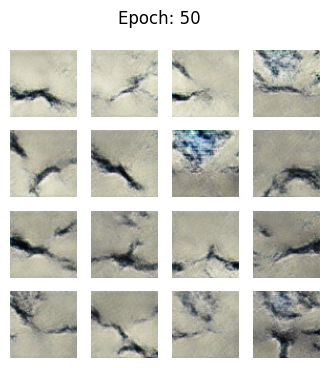

Epoch 50/50 | Time: 13.5s | Gen Loss: 1.6243 | Disc Loss: 0.8487
✅ Training Complete!


In [13]:
import time
from IPython import display

# --- 1. DEFINE LOSS AND OPTIMIZERS ---
# We use Binary Crossentropy to calculate how "wrong" the models are
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    # Discriminator should classify REAL images as 1 (True)
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    # Discriminator should classify FAKE images as 0 (False)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    # Generator wants the Discriminator to think the FAKE images are REAL (1)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers (Adam is standard for GANs)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# --- 2. DEFINE THE TRAINING STEP ---
# The @tf.function annotation compiles this function for fast execution on TPU/GPU
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # 1. Generator creates fake images
        generated_images = generator(noise, training=True)

        # 2. Discriminator evaluates both real and fake images
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # 3. Calculate Loss (How bad did they do?)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    # 4. Calculate Gradients (How should we change the weights?)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # 5. Update Weights (Apply the changes)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# --- 3. TRAINING LOOP ---
def train(dataset, epochs):
    print(f"🚀 Starting training for {epochs} epochs...")

    # We will track a fixed set of noise to see how the SAME seed improves over time
    seed = tf.random.normal([16, LATENT_DIM])

    for epoch in range(epochs):
        start = time.time()

        gen_loss_list = []
        disc_loss_list = []

        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            gen_loss_list.append(g_loss)
            disc_loss_list.append(d_loss)

        # Calculate average loss for this epoch
        avg_g_loss = sum(gen_loss_list) / len(gen_loss_list)
        avg_d_loss = sum(disc_loss_list) / len(disc_loss_list)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            generator.save('generator_model.keras')
            print(f"  💾 Model saved at epoch {epoch+1}")

        # VISUALIZATION UPDATE
        # Clear output to make a clean animation effect
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)

        print(f'Epoch {epoch + 1}/{epochs} | Time: {time.time()-start:.1f}s | Gen Loss: {avg_g_loss:.4f} | Disc Loss: {avg_d_loss:.4f}')

    # Save final model
    generator.save('generator_final.keras')
    print("✅ Training Complete!")

def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False (inference mode)
    predictions = model(test_input, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        # Rescale [-1, 1] -> [0, 1]
        plt.imshow((predictions[i, :, :, :] + 1) / 2.0)
        plt.axis('off')

    plt.suptitle(f"Epoch: {epoch}")
    plt.show()

# --- 4. RUN IT! ---
EPOCHS = 50
train(train_ds, EPOCHS)

🏭 Generating 100 new synthetic crack images...
✅ Saved 100 images to folder 'synthetic_cracks'

--- 🕵️ Visual Turing Test ---


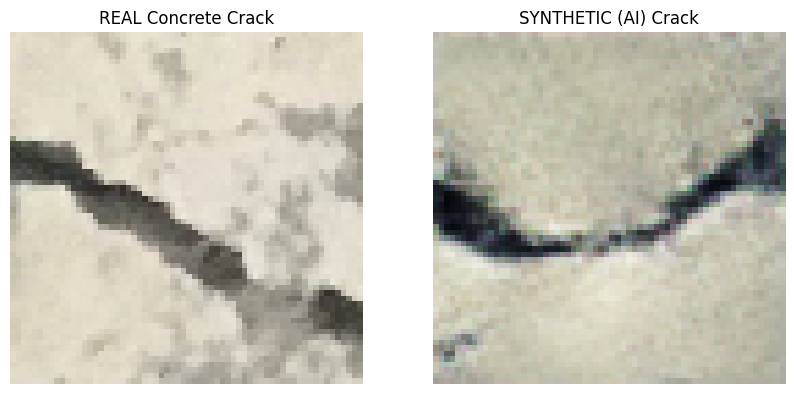


Preparing model for download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download prompt should appear shortly.


In [14]:
import shutil

# --- 1. GENERATE NEW SYNTHETIC DATA ---
print("🏭 Generating 100 new synthetic crack images...")

# Create a clean folder
output_folder = "synthetic_cracks"
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.makedirs(output_folder)

# Generate 100 images
num_images = 100
noise = tf.random.normal([num_images, LATENT_DIM])
generated_images = generator(noise, training=False)

# Save them as .jpg files
for i in range(num_images):
    # Rescale from [-1, 1] to [0, 255]
    img_array = (generated_images[i] + 1) * 127.5
    img_array = img_array.numpy().astype(np.uint8)

    file_path = os.path.join(output_folder, f"fake_crack_{i}.jpg")
    tf.keras.utils.save_img(file_path, img_array)

print(f"✅ Saved {num_images} images to folder '{output_folder}'")

# --- 2. THE VISUAL TURING TEST ---
# Let's compare a REAL image vs a FAKE image side-by-side
print("\n--- 🕵️ Visual Turing Test ---")

# Get a real image
real_batch = next(iter(train_ds))
real_img = (real_batch[0] + 1) / 2.0

# Get a fake image
fake_img = (generated_images[0] + 1) / 2.0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(real_img)
plt.title("REAL Concrete Crack")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(fake_img)
plt.title("SYNTHETIC (AI) Crack")
plt.axis("off")

plt.show()

# --- 3. DOWNLOAD YOUR MODEL ---
# This code creates a download link for your trained model file
from google.colab import files
print("\nPreparing model for download...")
files.download('generator_final.keras')
print("✅ Download prompt should appear shortly.")